In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn import decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

In [2]:
train_data_ = pickle.load(open('train_data/train_data_new', 'rb'))

In [5]:
train_data_.head()

,crew,experiment,seat,has_r_peak,has_ecg_peak,has_gsr_peak,event,time,eeg_fp1_filtered,eeg_f7_filtered,...,t5-p3-pz-p4-t6theta,t5-p3-pz-p4-t6alpha_low,t5-p3-pz-p4-t6alpha_high,t5-p3-pz-p4-t6beta,t5-p3-pz-p4-t6gamma,o1-o2theta,o1-o2alpha_low,o1-o2alpha_high,o1-o2beta,o1-o2gamma
0,1,CA,1,0,0,0,A,-1.714367,-0.263545,0.926641,...,-0.273852,-0.354617,-0.192741,-0.369647,-0.333646,0.528167,-1.048651,-0.590283,-0.240193,-0.020438
1,1,CA,1,0,0,0,A,-1.714329,-0.177267,1.004332,...,-0.270346,-0.306602,-0.149310,-0.375325,-0.327312,0.528217,-1.057778,-0.597163,-0.240114,-0.019782
2,1,CA,1,0,0,0,A,-1.714292,0.201824,1.031278,...,-0.261147,-0.212327,-0.062987,-0.382288,-0.315450,0.528216,-1.057227,-0.596747,-0.240121,-0.019822
3,1,CA,1,0,0,0,A,-1.714254,0.214679,0.913735,...,-0.260542,-0.206861,-0.057950,-0.382563,-0.314781,0.528218,-1.059037,-0.598115,-0.240097,-0.019691
4,1,CA,1,0,0,0,A,-1.714217,0.128852,0.875913,...,-0.269551,-0.297204,-0.140760,-0.376241,-0.326098,0.528136,-1.073101,-0.608798,-0.239813,-0.018671


In [6]:
train_data_.shape

(4867421, 196)

In [7]:
train_data_.head()

,crew,experiment,seat,has_r_peak,has_ecg_peak,has_gsr_peak,event,time,eeg_fp1_filtered,eeg_f7_filtered,...,t5-p3-pz-p4-t6theta,t5-p3-pz-p4-t6alpha_low,t5-p3-pz-p4-t6alpha_high,t5-p3-pz-p4-t6beta,t5-p3-pz-p4-t6gamma,o1-o2theta,o1-o2alpha_low,o1-o2alpha_high,o1-o2beta,o1-o2gamma
0,1,CA,1,0,0,0,A,-1.714367,-0.263545,0.926641,...,-0.273852,-0.354617,-0.192741,-0.369647,-0.333646,0.528167,-1.048651,-0.590283,-0.240193,-0.020438
1,1,CA,1,0,0,0,A,-1.714329,-0.177267,1.004332,...,-0.270346,-0.306602,-0.149310,-0.375325,-0.327312,0.528217,-1.057778,-0.597163,-0.240114,-0.019782
2,1,CA,1,0,0,0,A,-1.714292,0.201824,1.031278,...,-0.261147,-0.212327,-0.062987,-0.382288,-0.315450,0.528216,-1.057227,-0.596747,-0.240121,-0.019822
3,1,CA,1,0,0,0,A,-1.714254,0.214679,0.913735,...,-0.260542,-0.206861,-0.057950,-0.382563,-0.314781,0.528218,-1.059037,-0.598115,-0.240097,-0.019691
4,1,CA,1,0,0,0,A,-1.714217,0.128852,0.875913,...,-0.269551,-0.297204,-0.140760,-0.376241,-0.326098,0.528136,-1.073101,-0.608798,-0.239813,-0.018671


In [8]:
def encode_Var(arr):
    enc = []
    for val in arr:
        
        if (val=='A'):
            
            enc.append(0)
            
        elif(val=='B'):
            
            enc.append(1)
        elif(val=='C'):
            
            enc.append(2)
        elif(val=='D'):
            
            enc.append(3)
    return enc

In [9]:
encoded_vals = encode_Var(np.asarray(train_data_['event']))

In [10]:
train_data_['encoded_event'] = encoded_vals

### Removing crew, experiment and event from trainable features.

In [12]:
y = train_data_['encoded_event']

In [13]:
train_data_.drop(['crew','event','experiment','encoded_event'],axis=1,inplace=True)

In [15]:
train_data_['seat'] = train_data_['seat'].astype('int')
train_data_['has_r_peak'] = train_data_['has_r_peak'].astype('int')
train_data_['has_ecg_peak'] = train_data_['has_ecg_peak'].astype('int')
train_data_['has_gsr_peak'] = train_data_['has_gsr_peak'].astype('int')

In [41]:
pickle.dump(test_data_, open('test_data/test_data_newfeatures', 'wb'))

In [24]:
test_data_ = pickle.load(open('test_data/test_data_newfeatures', 'rb'))

In [16]:
x_train, x_cv, y_train, y_cv = train_test_split(train_data_, y, test_size=0.25, stratify=y)

## Splitting data into train and cross validation using TimeSeriesSplit() in each experiment

In [263]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

exp = ['CA','DA','SS']
tscv = TimeSeriesSplit(n_splits=2)

features = list(train_data_.columns)
x_train = pd.DataFrame(columns=features)
x_cv = pd.DataFrame(columns=features)

for e in exp:
    
    data_for_split = train_data_[(train_data_.experiment == e)].copy()
    
    for train_index, cv_index in tscv.split(data_for_split):
        x_tr, x_te = data_for_split.iloc[train_index], data_for_split.iloc[cv_index]
    
    x_train = pd.concat([x_train,x_tr])
    x_cv = pd.concat([x_cv,x_te])
    

## Random Model

In [19]:
ls = []
for i in range(0,x_train.shape[0]):
    ls_ = []
    rand_probs = np.random.rand(1,4)
    for prob in rand_probs[0]:
        val = prob/sum(rand_probs[0])
        ls_.append(val)
    ls.append(ls_)

rand_pred = np.asarray(ls)

ls = []
for i in range(0,x_cv.shape[0]):
    ls_ = []
    rand_probs = np.random.rand(1,4)
    for prob in rand_probs[0]:
        val = prob/sum(rand_probs[0])
        ls_.append(val)
    ls.append(ls_)

rand_pred_cv = np.asarray(ls)

print("Random Model Train logloss: ",log_loss(y_train,rand_pred))
print("Random Model cv logloss: ",log_loss(y_cv,rand_pred_cv))

Random Model Train logloss:  1.6453499132639418
Random Model cv logloss:  1.6460736775749176


## Logistic Regression

In [16]:
C=[.001,.01,.1]
for i in C:
    clf = LogisticRegression(C=i)
    clf.fit(x_train,y_train)
    
    pickle.dump(clf, open('LR_model_'+str(i), 'wb'))
    
    y_pred_train = clf.predict_proba(x_train)
    y_pred_cv = clf.predict_proba(x_cv)
    print("For alpha: ",i)
    print("Train logloss: ",log_loss(y_train,y_pred_train))
    print("CV logloss: ",log_loss(y_cv,y_pred_cv))
    print("*********************************************")

For alpha:  0.001
Train logloss:  0.2323471487581512
CV logloss:  0.2323913465915608
*********************************************
For alpha:  0.01
Train logloss:  0.2306172412503145
CV logloss:  0.23071645530426088
*********************************************
For alpha:  0.1
Train logloss:  0.2304177631267852
CV logloss:  0.23051943067457187
*********************************************


## Random Forest

In [29]:
alpha=[30,50]
for i in alpha:
    rf_cfl=RandomForestClassifier(n_estimators=i,max_depth=50,n_jobs=-1)
    rf_cfl.fit(x_train,y_train)
    pickle.dump(rf_cfl, open('rf_model_'+str(i), 'wb'))
    
    y_pred_train = rf_cfl.predict_proba(x_train)
    y_pred_cv = rf_cfl.predict_proba(x_cv)
    print("For alpha: ",i)
    print("Train logloss: ",log_loss(y_train,y_pred_train))
    print("CV logloss: ",log_loss(y_cv,y_pred_cv))
    print("*********************************************")

For alpha:  30
Train logloss:  0.021732641224348193
CV logloss:  0.05978690284047972
*********************************************
For alpha:  50
Train logloss:  0.02113017660463825
CV logloss:  0.05845845906898043
*********************************************


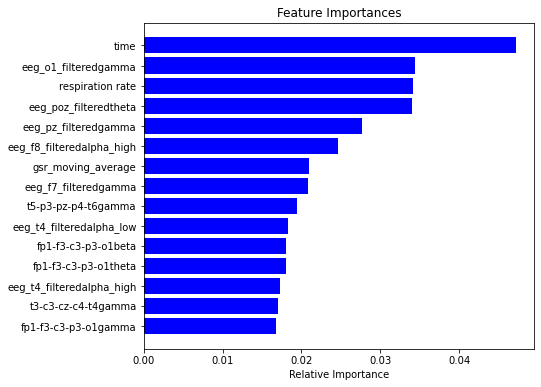

In [48]:

features = x_train.columns
importances = rf_cfl.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(7,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
important_features = []
for i in indices:
    important_features.append(features[i])

In [43]:
print(important_features)

['fp1-fp2theta', 'eeg_t3_filteredbeta', 't5-p3-pz-p4-t6theta', 'fp1-f3-c3-p3-o1gamma', 'eeg_t5_filteredgamma', 'eeg_fp2_filteredgamma', 'eeg_fz_filteredalpha_low', 't5-p3-pz-p4-t6gamma', 'eeg_f4_filteredtheta', 'fp2-f4-c4-p4-o2theta', 'eeg_o2_filteredtheta', 'eeg_poz_filteredgamma', 'eeg_f3_filteredtheta', 'fz-cz-pztheta', 'eeg_f8_filteredalpha_high', 'o1-o2theta', 'fp1-f3-c3-p3-o1beta', 'eeg_cz_filteredgamma', 'eeg_f7_filteredgamma', 't3-c3-cz-c4-t4gamma', 'gsr_moving_average', 'gsr_filtered', 'fp1-f3-c3-p3-o1theta', 'eeg_t4_filteredalpha_high', 'eeg_t4_filteredalpha_low', 'eeg_o1_filteredgamma', 'eeg_pz_filteredgamma', 'respiration rate', 'eeg_poz_filteredtheta', 'time']


## So the crafted features like EEG frequency bands , respiration rate and gsr_moving_average are in top 30 features. 

## XGBoost

In [ ]:
alpha=[100]

for i in alpha:
    xgb_cfl=XGBClassifier(n_estimators=i,max_depth=5,colsample_bytree=0.7,nthread=-1)
    xgb_cfl.fit(x_train,y_train)
    
    
    xgb_calib_clf = CalibratedClassifierCV(xgb_cfl, method="sigmoid")
    xgb_calib_clf.fit(x_train, y_train)

    pickle.dump(xgb_cfl, open('xgb_model_calib_'+str(i), 'wb'))

    y_pred_train = xgb_calib_clf.predict_proba(x_train)
    y_pred_cv = xgb_calib_clf.predict_proba(x_cv)
    print("Train logloss: ",log_loss(y_train,y_pred_train))
    print("CV logloss: ",log_loss(y_cv,y_pred_cv))


Train logloss:  0.8417951182069895
CV logloss:  0.926310529125779


In [15]:
alpha = 300
xgb_cfl=XGBClassifier(n_estimators=alpha,max_depth=5,colsample_bytree=0.7,nthread=-1)
xgb_cfl.fit(x_train,y_train)


In [16]:
pickle.dump(xgb_cfl, open('xgb_model_300', 'wb'))

In [17]:
xgb_calib_clf = CalibratedClassifierCV(xgb_cfl, method="isotonic")
xgb_calib_clf.fit(x_train, y_train)  
pickle.dump(xgb_cfl, open('xgb_model_calib_300', 'wb'))
y_pred_train = xgb_calib_clf.predict_proba(x_train)
y_pred_cv = xgb_calib_clf.predict_proba(x_cv)
print("Train logloss: ",log_loss(y_train,y_pred_train))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.6493812944203944
CV logloss:  0.8182311041460716


In [81]:
xgb_cfl=XGBClassifier()

params={
    'learning_rate':[0.01,0.05,0.15,0.2],
     'n_estimators':[350,450,550],
     'max_depth':[3,5,7],
    'colsample_bytree':[0.3,0.5,1],
    'subsample':[0.3,0.5,1]
}
rs_cfl=RandomizedSearchCV(xgb_cfl,param_distributions=params,verbose=10,n_jobs=-1,)
rs_cfl.fit(x_train_feat_imp, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 478.2min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 644.1min
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed: 752.8min remaining: 752.8min
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed: 875.7min remaining: 536.7min
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed: 990.2min remaining: 347.9min
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed: 1042.7min remaining: 169.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 1108.9min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=N

In [82]:
pickle.dump(rs_cfl, open('rs_cfl', 'wb'))

In [83]:
rs_cfl.best_params_

{'subsample': 1,
 'n_estimators': 350,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5}

In [84]:
xgb_cfl_best=XGBClassifier(n_estimators=350,max_depth=5,learning_rate=0.01,colsample_bytree=0.5,subsample=1,nthread=-1)
xgb_cfl_best.fit(x_train_feat_imp,y_train,verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
pickle.dump(xgb_cfl_best, open('xgb_cfl_best', 'wb'))

In [88]:
y_pred_train = xgb_cfl_best.predict_proba(x_train_feat_imp)
y_pred_cv = xgb_cfl_best.predict_proba(x_cv_feat_imp)
print("Train logloss: ",log_loss(y_train,y_pred_train))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.5932772290652153
CV logloss:  0.8621281748998794


## LGBM

In [11]:
import lightgbm as lgbm
from sklearn.model_selection import RandomizedSearchCV

In [21]:
lgbm_cfl = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4)

params={
    'learning_rate':[0.01,0.1,0.3],
     'n_estimators':[50,100,300],
     'max_depth':[3,5,7],
    'colsample_bytree':[0.5,0.7,0.8],
    'num_leaves':[20,30,50]
}
rs_cfl=RandomizedSearchCV(lgbm_cfl,param_distributions=params,verbose=10,n_jobs=-1)
rs_cfl.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed: 29.2min remaining: 29.2min
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed: 32.4min remaining: 19.8min
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed: 41.0min remaining: 14.4min
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed: 45.5min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 48.4min finished


RandomizedSearchCV(estimator=LGBMClassifier(metric='multi_logloss', num_class=4,
                                            objective='multiclass'),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 300],
                                        'num_leaves': [20, 30, 50]},
                   verbose=10)

In [22]:
rs_cfl.best_params_

{'num_leaves': 20,
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.3,
 'colsample_bytree': 0.7}

In [25]:
lgbm_cfl_2 = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=20,
                                   n_estimators=500,max_depth=5,learning_rate=.3,colsample_bytree=0.7)

lgbm_cfl_2.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=5, metric='multi_logloss',
               n_estimators=500, num_class=4, num_leaves=30,
               objective='multiclass')

In [26]:
y_pred_train = lgbm_cfl_2.predict_proba(x_train)
y_pred_cv = lgbm_cfl_2.predict_proba(x_cv)
print("Train logloss: ",log_loss(y_train,y_pred_train))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.08791106290181834
CV logloss:  0.09007561061390987


## Keeping only important features

In [97]:
x_tr_feat_imp = x_train.loc[:, important_features]

x_cv_feat_imp = x_cv.loc[:, important_features]

x_test_feat_imp = test_data_.loc[:, important_features]

In [74]:
lgbm_cfl_fs = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=30,
                                   n_estimators=2000,max_depth=5,learning_rate=.01,colsample_bytree=0.7)

lgbm_cfl_fs.fit(x_tr_feat_imp, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=5,
               metric='multi_logloss', n_estimators=2000, num_class=4,
               num_leaves=30, objective='multiclass')

In [75]:
y_pred_train = lgbm_cfl_fs.predict_proba(x_tr_feat_imp)
y_pred_cv = lgbm_cfl_fs.predict_proba(x_cv_feat_imp)
print("Train logloss: ",log_loss(y_train,y_pred_train))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.18455567751191237
CV logloss:  0.18614070117535605


In [104]:
lgbm_cfl_ = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=30,
                                   n_estimators=4000,max_depth=3,learning_rate=.01,colsample_bytree=0.7,reg_alpha=.1)

lgbm_cfl_.fit(tr_feat_imp, y)



LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=3,
               metric='multi_logloss', n_estimators=4000, num_class=4,
               num_leaves=30, objective='multiclass', reg_alpha=0.1)

In [105]:
y_pred = lgbm_cfl_.predict_proba(x_tr_feat_imp)
y_pred_cv = lgbm_cfl_.predict_proba(x_cv_feat_imp)
print("Train logloss: ",log_loss(y_test,y_pred))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.26275757589186405


## PCA

In [51]:
from sklearn import decomposition
pca = decomposition.PCA()

In [56]:
pca.n_components = 100
pca_ = pca.fit(x_train)

In [57]:
tr_dt_pca = pca_.transform(x_train)
cv_dt_pca = pca_.transform(x_cv)
te_dt_pca = pca_.transform(test_data_)

In [60]:
percentage_var_explained1 = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained1 = np.cumsum(percentage_var_explained1)

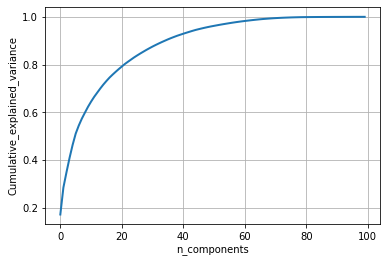

In [61]:
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained1, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


## Above graph indicates that 100% variance can be achieved with around 70 features

In [62]:
pca.n_components = 70
pca_ = pca.fit(x_train)

In [63]:
tr_dt_pca = pca_.transform(x_train)
cv_dt_pca = pca_.transform(x_cv)
te_dt_pca = pca_.transform(test_data_)

In [125]:
lgbm_cfl_ = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=40,
                                   n_estimators=10,max_depth=7,learning_rate=.1,colsample_bytree=0.8,min_data_in_leaf=100,reg_alpha=.01)

lgbm_cfl_.fit(tr_data_pca, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(colsample_bytree=0.8, max_depth=7, metric='multi_logloss',
               min_data_in_leaf=100, n_estimators=10, num_class=4,
               num_leaves=40, objective='multiclass', reg_alpha=0.01)

In [126]:
y_pred = lgbm_cfl_.predict_proba(tr_data_pca)
y_pred_cv = lgbm_cfl_.predict_proba(cv_data_pca)
print("Train logloss: ",log_loss(y_train,y_pred))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.5678693360983159
CV logloss:  0.5681861959205138


In [24]:
lgbm_cfl = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4)

params={
    'learning_rate':[0.01,0.1,0.3],
     'n_estimators':[25,50,100],
     'max_depth':[3,5,7],
    'colsample_bytree':[0.5,0.7,0.8],
    'num_leaves':[30,40,60],
    'min_data_in_leaf':[50,100,400],
    'reg_alpha':[.01,.1]
}
rs_cfl=RandomizedSearchCV(lgbm_cfl,param_distributions=params,verbose=10,n_jobs=-1)
rs_cfl.fit(tr_data_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:  5.1min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  31 out of  50 | elapsed:  6.2min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  37 out of  50 | elapsed:  7.8min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:  7.8min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.7min finished


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


RandomizedSearchCV(estimator=LGBMClassifier(metric='multi_logloss', num_class=4,
                                            objective='multiclass'),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.8],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'min_data_in_leaf': [50, 100, 400],
                                        'n_estimators': [25, 50, 100],
                                        'num_leaves': [30, 40, 60],
                                        'reg_alpha': [0.01, 0.1]},
                   verbose=10)

In [25]:
rs_cfl.best_params_

{'reg_alpha': 0.01,
 'num_leaves': 30,
 'n_estimators': 100,
 'min_data_in_leaf': 50,
 'max_depth': 7,
 'learning_rate': 0.3,
 'colsample_bytree': 0.5}

In [26]:
lgbm_cfl_ = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=30,
                                   n_estimators=100,max_depth=7,learning_rate=.3,colsample_bytree=0.5,min_data_in_leaf=50,reg_alpha=.01)

lgbm_cfl_.fit(tr_data_pca, y_train)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.3, max_depth=7,
               metric='multi_logloss', min_data_in_leaf=50, num_class=4,
               num_leaves=30, objective='multiclass', reg_alpha=0.01)

In [28]:
y_pred = lgbm_cfl_.predict_proba(tr_data_pca)
y_pred_cv = lgbm_cfl_.predict_proba(cv_data_pca)
print("Train logloss: ",log_loss(y_train,y_pred))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.23142617288868655
CV logloss:  0.23542096312896782


## Custom Stacking Classifier

In [17]:
d_train, d_test, y_dtrain, y_dtest = train_test_split(train_data_, y, test_size=0.20, stratify=y)

In [18]:
d1_train, d2_train, y_d1train, y_d2train = train_test_split(d_train, y_dtrain, test_size=0.50, stratify=y_dtrain)

In [19]:
def createSample(data,target):
    
    dt_size = int(.7*data.shape[0])
    
    rand_index = np.random.choice(data.shape[0],dt_size,replace=True)
    
    sampled_data = data[data.index.isin(rand_index)]
    
    sampled_y = target[target.index.isin(rand_index)]
    
    return sampled_data, sampled_y
    

In [20]:
def createBaseModel(modelName,data,target):
    
    
    if(modelName=='Decision Tree'):
        
        model = DecisionTreeClassifier()
        
    elif(modelName=='KNN'):
        
        model = KNeighborsClassifier(algorithm='kd_tree')
    
    elif(modelName=='Logistic Regression'):
        
        model = LogisticRegression()
    
    elif(modelName=='SVM'):
        
        model = SVC()
        
    elif(modelName=='Naive Bayes'):
        
        model = GaussianNB()
        
    elif(modelName=='LGBM'):
        
        model = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=40,
                                   n_estimators=30,max_depth=7,learning_rate=.1,colsample_bytree=0.5)
    elif(modelName=='Random Forest'):
        
        model = RandomForestClassifier(n_estimators=20,n_jobs=-1)
        
    elif(modelName=='XGB'):
        
        model = XGBClassifier(n_estimators=40,max_depth=5,learning_rate=0.01,colsample_bytree=0.5,subsample=1,nthread=-1)
        
            
    model.fit(data,target)
    
    
    return model
        

In [21]:
def createPredictionsDataset(models_list,D1,Y1,D2):
    
    trained_models = []
    
    for i,m in tqdm(enumerate(models_list)):

        dt_sample, y_sample = createSample(D1,Y1)
        
        trained_model = createBaseModel(m,dt_sample,y_sample)
        
        trained_models.append(trained_model)
        
        print("Trained model: ",m)

        if(i==0):

            predicts_base = trained_model.predict(D2)
            predicts_base = pd.DataFrame(predicts_base)

        else:

            pred = trained_model.predict(D2)
            pred = pd.DataFrame(pred)

        if(i>0):

            predicts_base = pd.concat([predicts_base,pred],axis=1)
            
    return predicts_base,trained_models

In [22]:
models = ['Logistic Regression','Naive Bayes','LGBM']

pred_data_base, base_models = createPredictionsDataset(models,d1_train,y_d1train,d2_train)

0it [00:00, ?it/s]

Trained model:  Logistic Regression


1it [00:26, 26.26s/it]

Trained model:  Naive Bayes


2it [00:57, 27.80s/it]

Trained model:  LGBM


3it [01:17, 25.67s/it]


### Now training metaclassifier

In [23]:
meta_classifier = DecisionTreeClassifier()

meta_classifier.fit(pred_data_base,y_d2train)

DecisionTreeClassifier()

### Evaluation

In [25]:
for i,tr_m in enumerate(base_models):
    
    if(i==0):
    
        predicts_base_test = tr_m.predict(d_test)
    
        predicts_base_test = pd.DataFrame(predicts_base_test)

    if(i>0):
        
        preds = tr_m.predict(d_test)
        preds = pd.DataFrame(preds)

        predicts_base_test = pd.concat([predicts_base_test,preds],axis=1)




In [26]:
final_test_preds = meta_classifier.predict_proba(predicts_base_test)

print("Test logloss: ",log_loss(y_dtest,final_test_preds))

Test logloss:  0.4860050431323418


In [78]:
pickle.dump(meta_classifier, open('stacked_classifier/meta_classifier', 'wb'))
pickle.dump(d_test_, open('stacked_classifier/d_test_', 'wb'))
pickle.dump(base_models, open('stacked_classifier/base_models', 'wb'))
pickle.dump(pca_, open('stacked_classifier/pca_', 'wb'))

### Submission test predictions

In [27]:
for i,tr_m in enumerate(base_models):
    
    if(i==0):
    
        submission_pred_data = tr_m.predict(test_data_)
    
        submission_pred_data = pd.DataFrame(submission_pred_data)

    if(i>0):
        
        submission_preds_dt = tr_m.predict(test_data_)
        submission_preds_dt = pd.DataFrame(submission_preds_dt)

        submission_pred_data = pd.concat([submission_pred_data,submission_preds_dt],axis=1)

In [28]:
pickle.dump(submission_pred_data, open('stacked_classifier/submission_pred_data2', 'wb'))

In [29]:
submission_preds = meta_classifier.predict_proba(submission_pred_data)

In [30]:
submission_cv = pd.DataFrame(data = submission_preds,columns = ['A','B','C','D'])

In [32]:
submission_cv['id'] = submission_cv.index

In [33]:
submission_cv = submission_cv[['id','A','B','C','D']]

In [34]:
submission_cv.head()

,id,A,B,C,D
0,0,0.944718,0.003441,0.050072,0.001769
1,1,0.420829,0.023949,0.555222,0.000000
2,2,0.420829,0.023949,0.555222,0.000000
3,3,0.420829,0.023949,0.555222,0.000000
4,4,0.420829,0.023949,0.555222,0.000000


In [35]:
submission_cv.shape

(17965143, 5)

In [36]:
submission_cv.to_csv('Custom_stacking_classifier10.csv', index = False, header=True)

## Modelling with new added features like heart rate , respiration rate and eeg power features

In [42]:
lgbm_cfl_ = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=30,
                                   n_estimators=40,max_depth=7,learning_rate=.1,colsample_bytree=0.5,min_data_in_leaf=100,reg_alpha=.01)

lgbm_cfl_.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(colsample_bytree=0.5, max_depth=7, metric='multi_logloss',
               min_data_in_leaf=100, n_estimators=40, num_class=4,
               num_leaves=30, objective='multiclass', reg_alpha=0.01)

In [43]:
y_pred = lgbm_cfl_.predict_proba(x_train)
y_pred_cv = lgbm_cfl_.predict_proba(x_cv)
print("Train logloss: ",log_loss(y_train,y_pred))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.0878268086048108
CV logloss:  0.08801411151276309


In [13]:
lgbm_cfl_ = lgbm.LGBMClassifier(objective='multiclass',metric='multi_logloss',num_class=4,num_leaves=40,
                                   n_estimators=30,max_depth=7,learning_rate=.1,colsample_bytree=0.5,min_data_in_leaf=100,reg_alpha=.01)

lgbm_cfl_.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(colsample_bytree=0.5, max_depth=7, metric='multi_logloss',
               min_data_in_leaf=100, n_estimators=40, num_class=4,
               num_leaves=30, objective='multiclass', reg_alpha=0.01)

In [14]:
y_pred = lgbm_cfl_.predict_proba(x_train)
y_pred_cv = lgbm_cfl_.predict_proba(x_cv)
print("Train logloss: ",log_loss(y_train,y_pred))
print("CV logloss: ",log_loss(y_cv,y_pred_cv))

Train logloss:  0.08963250942404453
CV logloss:  0.09029178600959277


In [41]:
pickle.dump(lgbm_cfl_, open('best_model/lgbm_40est', 'wb'))

## CNN

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Activation,Dropout,Flatten,Conv1D,BatchNormalization,MaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [18]:
# https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

train_dt = x_train.to_numpy()
cv_dt = x_cv.to_numpy()
y_train = y_train.to_numpy()
y_cv = y_cv.to_numpy()

train_dt = tr_data_pca.reshape(train_dt.shape[0],train_dt.shape[1], 1)
cv_dt = cv_data_pca.reshape(cv_dt.shape[0],cv_dt.shape[1], 1)


In [19]:
test_dt = test_data_.to_numpy()
test_dt = te_data_pca.reshape(test_data_.shape[0],test_data_.shape[1], 1)

In [22]:
y_train_ = tf.keras.utils.to_categorical(y_train, 4)
y_cv_ = tf.keras.utils.to_categorical(y_cv, 4)

In [69]:

model =keras.models.Sequential()

model.add(Input(shape=(train_dt.shape[1],1)))

model.add(Conv1D(filters=128, kernel_size=8, padding='valid', activation='relu', kernel_initializer=tf.keras.initializers.he_normal()))
model.add(Conv1D(filters=64, kernel_size=6, padding='valid', activation='relu', kernel_initializer=tf.keras.initializers.he_normal()))
model.add(MaxPool1D(pool_size=2, padding='valid'))

model.add(Dropout(.2))
model.add(Flatten())

model.add(Dense(units=30,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=10)))

model.add(Dense(units=20,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=10)))

model.add(Dense(units=4,activation='softmax',kernel_initializer=tf.keras.initializers.he_normal(seed=3)))


In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 8, 128)            1152      
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 3, 64)             49216     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_8 (Dense)              (None, 20)               

In [71]:
filepath="model_save/weights-{epoch:02d}-{accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss',  verbose=1, save_best_only=True, mode='auto')


In [72]:
batch=50000
ep = 5

optimizer = tf.keras.optimizers.Adam(lr=0.01)
#optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01)
#optimizer = tf.keras.optimizers.SGD(learning_rate=.01, momentum=0.9)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
model.fit(train_dt,y_train_,validation_data=(cv_dt,y_cv_),epochs=ep,batch_size=batch,callbacks=[checkpoint])

Epoch 1/5
73/74 [============================>.] - ETA: 0s - loss: 1.1248 - accuracy: 0.6031
Epoch 00001: val_loss improved from inf to 0.84586, saving model to model_save/weights-01-0.6031.hdf5
74/74 [==============================] - 32s 433ms/step - loss: 1.1248 - accuracy: 0.6031 - val_loss: 0.8459 - val_accuracy: 0.6682
Epoch 2/5
73/74 [============================>.] - ETA: 0s - loss: 0.8208 - accuracy: 0.6721
Epoch 00002: val_loss improved from 0.84586 to 0.75507, saving model to model_save/weights-02-0.6721.hdf5
74/74 [==============================] - 32s 439ms/step - loss: 0.8208 - accuracy: 0.6721 - val_loss: 0.7551 - val_accuracy: 0.6981
Epoch 3/5
73/74 [============================>.] - ETA: 0s - loss: 0.7379 - accuracy: 0.7118
Epoch 00003: val_loss improved from 0.75507 to 0.69758, saving model to model_save/weights-03-0.7118.hdf5
74/74 [==============================] - 32s 438ms/step - loss: 0.7379 - accuracy: 0.7118 - val_loss: 0.6976 - val_accuracy: 0.7255
Epoch 4/5
7

In [73]:
ep = 50
model.fit(train_dt,y_train_,validation_data=(cv_dt,y_cv_),epochs=ep,batch_size=batch,callbacks=[checkpoint])

Epoch 1/50
73/74 [============================>.] - ETA: 0s - loss: 0.6230 - accuracy: 0.7682
Epoch 00001: val_loss did not improve from 0.59322
74/74 [==============================] - 33s 452ms/step - loss: 0.6230 - accuracy: 0.7682 - val_loss: 0.5999 - val_accuracy: 0.7762
Epoch 2/50
73/74 [============================>.] - ETA: 0s - loss: 0.5836 - accuracy: 0.7900
Epoch 00002: val_loss improved from 0.59322 to 0.58028, saving model to model_save/weights-02-0.7900.hdf5
74/74 [==============================] - 33s 448ms/step - loss: 0.5836 - accuracy: 0.7900 - val_loss: 0.5803 - val_accuracy: 0.7892
Epoch 3/50
73/74 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.7968
Epoch 00003: val_loss did not improve from 0.58028
74/74 [==============================] - 33s 444ms/step - loss: 0.5692 - accuracy: 0.7968 - val_loss: 0.5835 - val_accuracy: 0.7852
Epoch 4/50
73/74 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.8039
Epoch 00004: val_los